## Gridworld Problem
There exists a 4x4 grid as shown below. The shaded cells represent terminal state while all other cells (numbered 1 to 14) represent a nonterminal state. The actions our agent can take at each state are: Left, Right, Up and Down. Upon colliding with the walls of the grid, the agent retains its state. Our agent receives a reward of -1 for each timestep it spends on a non-terminal state and 0 for reaching the terminal state. The action that the agent takes from a given state is random with equal probability of taking each action. The new state and the reward obtained after taking an action are completely deterministic. The problem is to find the optimal policy to take in such an environment.<br>
(Example 4.1 from Introduction to Reinforcement Learning by Richard Sutton and Andrew Barto)

#### Dependencies

In [174]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import random

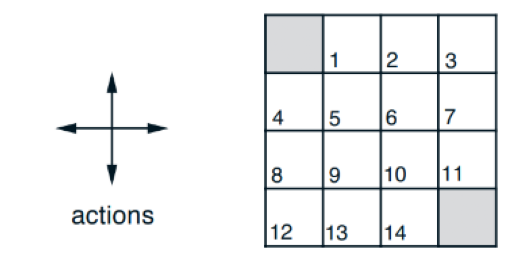

In [2]:
image = img.imread("Gridworld_pic.png")  # Load the image
plt.imshow(image)  # Display it
plt.axis("off")  # Hide axes
plt.show()

#### Environment Class

In [185]:
class GridWorld_Env:
    #Initialisation
    def __init__(self, Policy0, gamma = 1):
        self.n = 14                                 #Number of non-terminal States
        self.S = np.array(range(1,15))              #Set of non-terminal States
        self.A = ["left", "right", "up", "down"]    #Set of all Actions
        self.V = np.zeros(self.n + 2)               #Value Function
        self.q = np.zeros((self.n + 2, 4))          #Action-value Function
        self.Policy = Policy0                       #Policy
        self.gamma = gamma                          #Discount Factor

        #Creating a map between actions and indices
        self.action_map = {"left": 0, "right": 1, "up": 2, "down": 3}

        #Calculating Optimal Policy
        self.optimal_Policy()

    #Reward Function
    def reward (self, s, a):
        if ((s == 1 and a == "left") or (s == 14 and a == "right")):
            return 0
        else:
            return -1

    #Finding next state from current state (s) and action (a)
    def next_state (self, s, a):
        if ((s == 1 and a == "left") or (s == 14 and a == "right")):
            return 0
        elif ((s < 4 and a == "up") or (s > 11 and a == "down") or (s % 4 == 3 and a == "right") or (s % 4 == 0 and a == "left")):
            return s
        elif (a == "left"):
            return s - 1
        elif (a == "right"):
            return s + 1
        elif (a == "up"):
            return s - 4
        elif (a == "down"):
            return s + 4

    #Calculating Value Function via Iterations
    def update_Vpi (self):
        tolerance = 10 ** -6
        while (True):
            delta = 0
            for s in self.S:
                v_old = self.V[s]
                v = 0
                for a in self.A:
                    s_new = self.next_state(s, a)
                    v += self.Policy[s, self.action_map[a]] * (self.reward(s,a) + self.gamma * self.V[s_new])
                self.V[s] = v
                delta = max(delta, abs(self.V[s] - v_old))
            if (delta < tolerance):
                return

    #Updating Action-Value Function
    def update_Qpi (self):
        for s in self.S:
            for a in self.A:
                s_new = self.next_state(s,a)
                self.q[s,self.action_map[a]] = self.reward(s,a) + self.gamma * self.V[s_new]

    #Updating Policy Function
    def update_Policy(self):
        temp_Policy = np.array(np.argmax(self.q, axis=1))
        self.Policy = np.zeros((16, 4))
        for s in self.S:
            self.Policy[s,temp_Policy[s]] = 1

    #Calculating Optimal Policy via Policy Iteration
    def optimal_Policy (self):
        tolerance = 10 ** -6
        while (True):
            old_max = max(self.V)
            self.update_Vpi()
            self.update_Qpi()
            self.update_Policy()
            new_max = max(self.V)
            if (abs(new_max - old_max) < tolerance):
                return

    #Print Value Function
    def get_Vpi (self):
        for i in range(4):
            for j in range(4):
                print(f"{self.V[i*4 + j]: .2f}", end = " ")
            print("\n")

    #Print Policy
    def get_Policy (self):
        map_ = {0: "\u2190", 1: "\u2192", 2: "\u2191", 3:"\u2193"}
        policy = np.argmax(self.Policy, axis=1)
        
        for i in range(4):
            for j in range(4):
                if ((i == 0 and j == 0) or (i == 3 and j == 3)):
                    print("o", end = " ")
                    continue
                print(map_[policy[i*4 + j]], end = " ")
            print("\n")

#### Initial Policy

In [176]:
Policy = 0.25 * np.ones((16, 4))

#### Creating Environment

In [186]:
env = GridWorld_Env(Policy)

#### Optimal Value Function

In [189]:
env.get_Vpi()

 0.00 -13.31 -19.44 -21.50 

-13.69 -17.50 -19.50 -19.56 

-19.56 -19.50 -17.50 -13.69 

-21.50 -19.44 -13.31  0.00 



#### Optimal Policy

In [188]:
env.get_Policy()

o ← ← ← 

↑ ↑ ← ↓ 

↑ ↑ ↓ ↓ 

→ → → o 

